<a href="https://colab.research.google.com/github/cyberust/DietSimulation/blob/main/Diet_Simulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

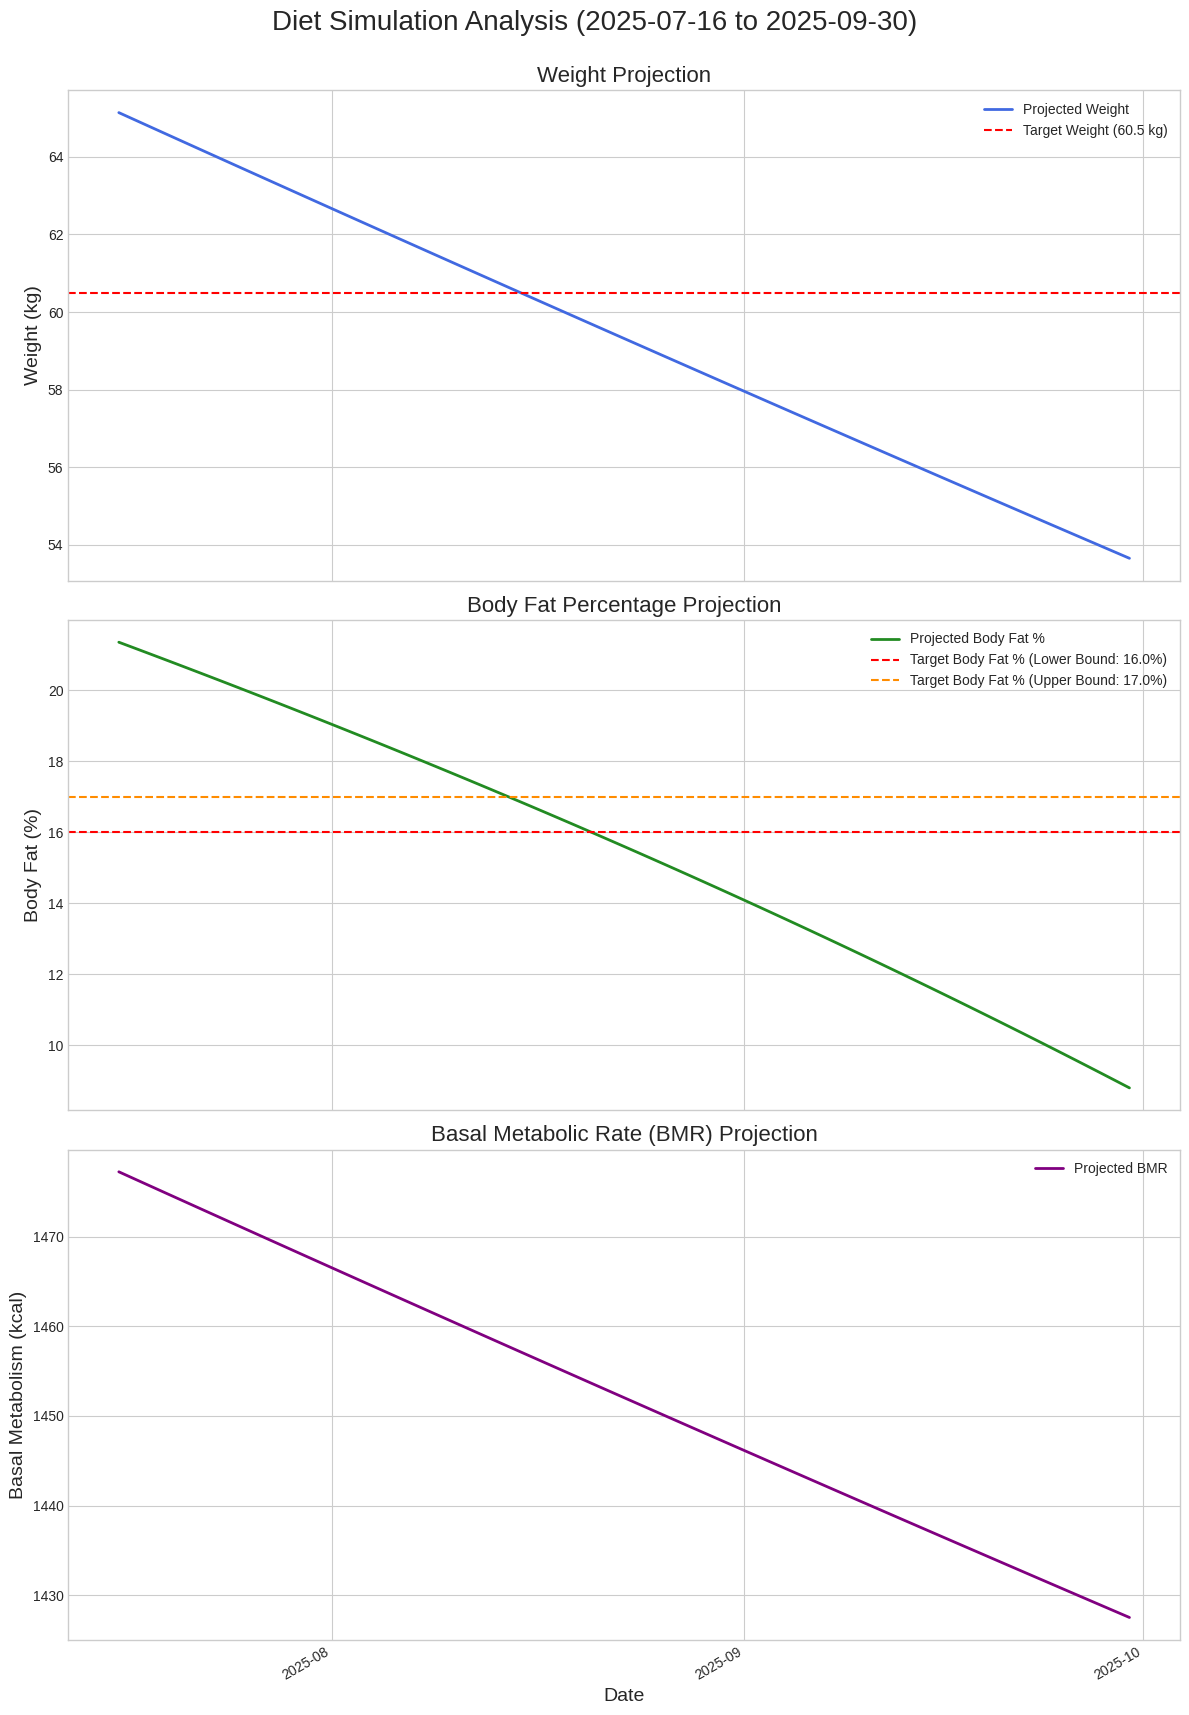

--- Simulation Forecast for Final Day (2025-09-30) ---
Projected Weight: 53.65 kg
Projected Body Fat %: 8.79 %
Projected BMR: 1428 kcal


In [15]:
# ==============================================================================
# Step 1: Library Imports
# ==============================================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import date

# ==============================================================================
# Step 2: Simulation Configuration
# ==============================================================================
# --- Simulation Period ---
start_date = date(2025, 7, 16)
end_date = date(2025, 9, 30)
# Optimized date range creation using pandas
date_range = pd.date_range(start=start_date, end=end_date)
days = len(date_range)

# --- Initial Body State ---
initial_weight_kg = 65.3
initial_fat_percentage = 0.215
initial_lbm = initial_weight_kg * (1 - initial_fat_percentage)
initial_fat_mass = initial_weight_kg * initial_fat_percentage

# --- Targets ---
target_weight_kg = 60.5
target_fat_percentage_lower = 0.16
target_fat_percentage_upper = 0.17

# --- Metabolic & Caloric Assumptions ---
calorie_intake = 1100
# Average daily calorie expenditure from exercise
exercise_calorie_expenditure = (335 * 5 + 100 * 3) / 7
# Thermic Effect of Food (set to 15% for a high-protein diet)
tef_percentage = 0.15
# Non-Exercise Activity Thermogenesis (set to 20% of BMR)
neat_percentage = 0.20
# Assumption for weight loss composition (considering high protein and strength training)
fat_loss_ratio = 0.80  # 80% of weight loss is fat
lbm_loss_ratio = 0.20  # 20% of weight loss is Lean Body Mass
# Conversion factor for calories to fat (kg)
calories_per_kg_fat = 7200

# ==============================================================================
# Step 3: Run Simulation
# ==============================================================================
# Prepare a list to store daily records
simulation_data = []

# Initialize variables for the loop
current_weight = initial_weight_kg
current_lbm = initial_lbm
current_fat_mass = initial_fat_mass

for day in date_range:
    # Calculate Basal Metabolic Rate (BMR) using the Katch-McArdle formula
    bmr = 370 + (21.6 * current_lbm)

    # Calculate Total Daily Energy Expenditure (TDEE)
    tef = calorie_intake * tef_percentage
    neat = bmr * neat_percentage
    tdee = bmr + exercise_calorie_expenditure + tef + neat

    # Calculate the daily calorie deficit
    calorie_deficit = tdee - calorie_intake

    # Calculate total weight loss in kg for the day
    weight_loss_kg = calorie_deficit / calories_per_kg_fat

    # Apportion the loss to fat and LBM
    fat_loss_kg = weight_loss_kg * fat_loss_ratio
    lbm_loss_kg = weight_loss_kg * lbm_loss_ratio

    # Update body composition metrics
    current_weight -= weight_loss_kg
    current_fat_mass -= fat_loss_kg
    current_lbm -= lbm_loss_kg
    current_fat_percentage = current_fat_mass / current_weight if current_weight > 0 else 0

    # Record the data for the day
    simulation_data.append({
        'Date': day,
        'Weight (kg)': current_weight,
        'Fat Percentage (%)': current_fat_percentage * 100,
        'Basal Metabolism (kcal)': bmr
    })

# Convert the list of records into a pandas DataFrame
df_sim = pd.DataFrame(simulation_data)

# ==============================================================================
# Step 4: Visualize Results
# ==============================================================================
plt.style.use('seaborn-v0_8-whitegrid')
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 18), sharex=True)
fig.suptitle(f'Diet Simulation Analysis ({start_date} to {end_date})', fontsize=20, y=0.95)

# 1. Weight Projection
ax1.plot(df_sim['Date'], df_sim['Weight (kg)'], label='Projected Weight', color='royalblue', linewidth=2)
ax1.axhline(y=target_weight_kg, color='red', linestyle='--', label=f'Target Weight ({target_weight_kg} kg)')
ax1.set_ylabel('Weight (kg)', fontsize=14)
ax1.set_title('Weight Projection', fontsize=16)
ax1.legend()

# 2. Body Fat Percentage Projection
ax2.plot(df_sim['Date'], df_sim['Fat Percentage (%)'], label='Projected Body Fat %', color='forestgreen', linewidth=2)
ax2.axhline(y=target_fat_percentage_lower * 100, color='red', linestyle='--', label=f'Target Body Fat % (Lower Bound: {target_fat_percentage_lower*100:.1f}%)')
ax2.axhline(y=target_fat_percentage_upper * 100, color='darkorange', linestyle='--', label=f'Target Body Fat % (Upper Bound: {target_fat_percentage_upper*100:.1f}%)')
ax2.set_ylabel('Body Fat (%)', fontsize=14)
ax2.set_title('Body Fat Percentage Projection', fontsize=16)
ax2.legend()

# 3. Basal Metabolism Projection
ax3.plot(df_sim['Date'], df_sim['Basal Metabolism (kcal)'], label='Projected BMR', color='purple', linewidth=2)
ax3.set_ylabel('Basal Metabolism (kcal)', fontsize=14)
ax3.set_title('Basal Metabolic Rate (BMR) Projection', fontsize=16)
ax3.legend()

# --- Common X-axis formatting ---
ax3.set_xlabel('Date', fontsize=14)
ax3.xaxis.set_major_locator(mdates.MonthLocator())
ax3.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m')) # English date format
plt.xticks(rotation=30, ha='right')
plt.tight_layout(rect=[0, 0, 1, 0.95]) # Adjust layout to prevent title overlap

plt.show()

# ==============================================================================
# Step 5: Display Final Day's Forecast
# ==============================================================================
final_day_result = df_sim.iloc[-1]
print(f"--- Simulation Forecast for Final Day ({end_date.strftime('%Y-%m-%d')}) ---")
print(f"Projected Weight: {final_day_result['Weight (kg)']:.2f} kg")
print(f"Projected Body Fat %: {final_day_result['Fat Percentage (%)']:.2f} %")
print(f"Projected BMR: {final_day_result['Basal Metabolism (kcal)']:.0f} kcal")